# Airline passengers prediction


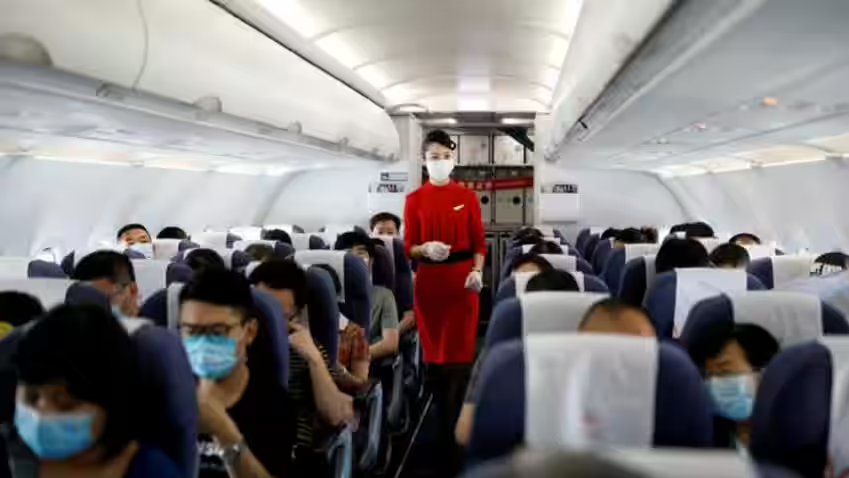

## INTRODUCTION

The Air passengers dataset is downloaded from kaggle. This dataset gives information of monthly passengers totals of a US airline from 1949 to 1960. This report analyse the data using suitable time series model and forecasts the number of passengers for the next 2 years.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error


## Importing Dataset

In [2]:
df =pd.read_csv('AirPassenger.csv',parse_dates=['Year-Month'])

In [3]:
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df.shape

(144, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Year-Month  144 non-null    datetime64[ns]
 1   Pax         144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
# renaiming column for better readabilty
df.rename({'Pax':'Num_of_Passengers'},inplace = True,axis=1)

In [7]:
df.describe()

,Num_of_Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
df.nunique() 
#insight: 144 rows and 144 unique value of Year-month therefore
# no date is duplicate

Year-Month           144
Num_of_Passengers    118
dtype: int64

In [9]:
for i in df:
    print(df[i].unique())
    print("*******"*10)
#insight:- no unwanted symbols in data    

['1949-01-01T00:00:00.000000000' '1949-02-01T00:00:00.000000000'
 '1949-03-01T00:00:00.000000000' '1949-04-01T00:00:00.000000000'
 '1949-05-01T00:00:00.000000000' '1949-06-01T00:00:00.000000000'
 '1949-07-01T00:00:00.000000000' '1949-08-01T00:00:00.000000000'
 '1949-09-01T00:00:00.000000000' '1949-10-01T00:00:00.000000000'
 '1949-11-01T00:00:00.000000000' '1949-12-01T00:00:00.000000000'
 '1950-01-01T00:00:00.000000000' '1950-02-01T00:00:00.000000000'
 '1950-03-01T00:00:00.000000000' '1950-04-01T00:00:00.000000000'
 '1950-05-01T00:00:00.000000000' '1950-06-01T00:00:00.000000000'
 '1950-07-01T00:00:00.000000000' '1950-08-01T00:00:00.000000000'
 '1950-09-01T00:00:00.000000000' '1950-10-01T00:00:00.000000000'
 '1950-11-01T00:00:00.000000000' '1950-12-01T00:00:00.000000000'
 '1951-01-01T00:00:00.000000000' '1951-02-01T00:00:00.000000000'
 '1951-03-01T00:00:00.000000000' '1951-04-01T00:00:00.000000000'
 '1951-05-01T00:00:00.000000000' '1951-06-01T00:00:00.000000000'
 '1951-07-01T00:00:00.000

In [10]:
df.tail()

,Year-Month,Num_of_Passengers
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [11]:
df.isnull().sum()

Year-Month           0
Num_of_Passengers    0
dtype: int64

In [12]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Year-Month[datetime64[ns]],"Min: 1949-01-01Max: 1960-12-01Duration: 4,352 days",144 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAABNCAYAAACxBha+AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACS0lEQVR4nO3Xu47aUBhF4f+Yi8xFthAKdDRTRkrhkofIw+YRUvAEFGlS0SEhywjPWBjjtGkGbA/s5GjW1w4Hb8GSPbi6rg1QCP71AHwexAaZ/q0/OudGZjbs8L7nuq7fuk1qz5edZv5sfcbOd2Nzzo3m8/n3KIpmba92PB5T59wPxYfjy04zf7Y+a+etO9swiqLZer1+i+O4aHqxLMvCzWYzOxwOQzNTfIm+7DTzZ+tTdt58jJqZxXFcLBaL15ZjRy1f/2G+7DTzZ+ujd/IDATJ372xdVFU1MLPIOdf2aGBm15Znouv1Omh7ITP5TjN/tnbeecvDY8vzfFCW5bfVatXr9XqNn/dVVQ3yPH+ZTqe/gyAom54ryzKsquprURQ/zazxLV+906etXXfe8/DYzudzPwzDcZIkxXK5TJue2+12s+12+yVJkl8dzo0vl0vvf97p09auO+95ymPUzGwymbT65zJN09FHznWl2vn32a58+Uzfww8EyBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJAhNsgQG2SIDTLEBhligwyxQYbYIENskCE2yBAbZIgNMsQGGWKDDLFBhtggQ2yQITbIEBtkiA0yxAYZYoMMsUGG2CBDbJDp33tBlmVhmzc8nU6hmVme5+F+vx9zzr+tXc/da+UPA9qNz9yHd1UAAAAASUVORK5CYII="">",0(0.0%)
2,Num_of_Passengers[int64],Mean (sd) : 280.3 (120.0)min < med < max:104.0 < 265.5 < 622.0IQR (CV) : 180.5 (2.3),118 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKQAAABACAYAAACUYNzVAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACb0lEQVR4nO3cQa6aUBTG8XPL06AmEGOjMzfQpAOHLqKL7RJq4grcgTMTQjDSR0Skg2rsa1INFygH+P/m18fgy5Xz3fs0eZ4LoMWnph8A+NNbXR9sjBmJyNBy+TnP8/cqnwftUEsgjTGj2Wz2zfO8qc364/EYGmO+E8r+qWuHHHqeN12v1+++7ydFFkZR5G6322kQBEMRIZA9U9tXtoiI7/vJfD7/abF0VPnDoBUYaqAKgYQqBBKqPH2HLFHdeNfrdWD3SOizfwayTHWTpqmbZdmXJEl+iIjNUIOeerZDWlc3+/1+utvtxpfLxSn5fOiZl7WPTXUThiG1DazU2kO2DcedzSOQNxx36kAgHzjuVIBA/oXjzmZRjEMVAglVCCRUUfkOmWXZQEQ8Y4zNcuqXFlMXyDiOB2mafl0ul47jOIWmXRHql7ZTF8jz+fzmuu54tVoli8UiLLI2iiJ3s9nMgyD4bIw5FvzTXAhRQF0g7yaTSeH6pczuyoUQHdQG0kaZ3ZULITp0KpB3NrsrF0J0oPaBKgQSqhBIqEIgoQqBhCoEEqoQSKhCIKFKJ4vxJnBDqRoEsgLcUKoOgaxA2RtK/IPYA4GskM0Z+g3n6DcMNVCFQEIVvrIVYEJ/IJANY0L/iEA2jAn9IwKpBBP6bww1UIVAQhUCCVUIJFQhkFCFKbvlulaqE8gW62KpTiBbrIulOoHsgC6V6gw1UIVAQhUCCVV4h+wxjZURgewprZURgeypBn/LXeTJ7koge+5//5a7yPPdlUCisDoLeQIJa3UU8tQ+UOXlDhlFkVv0Q0+nkysiEsexezgcxqxl7d2rPP0CdFPKaEpLiDEAAAAASUVORK5CYII="">",0(0.0%)


In [13]:
df.set_index('Year-Month',inplace= True)
df

,Num_of_Passengers
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


## EDA (Expolatoray Data Analysis)

<Axes: >

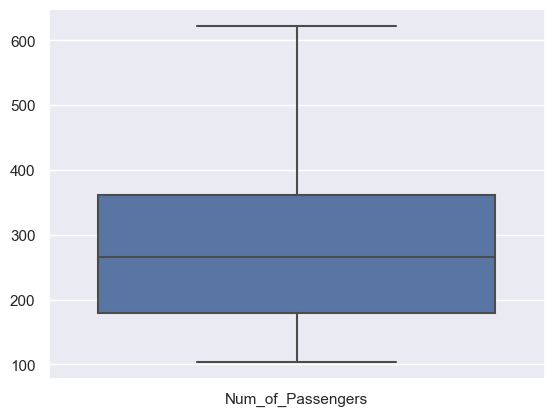

In [14]:
sns.boxplot(data=df)

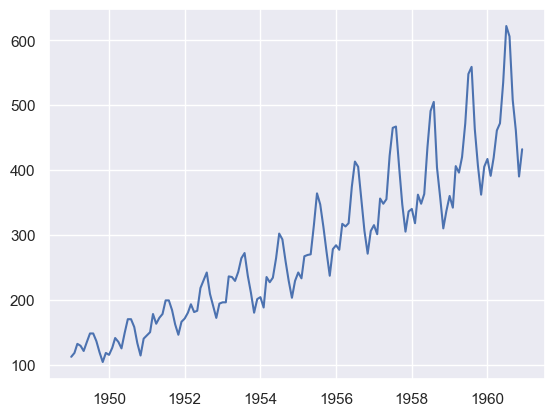

In [15]:
plt.plot(df)

-  From the above time series plot, we can observe positive trend over the years.

-  There is a presence of strong seasonality.


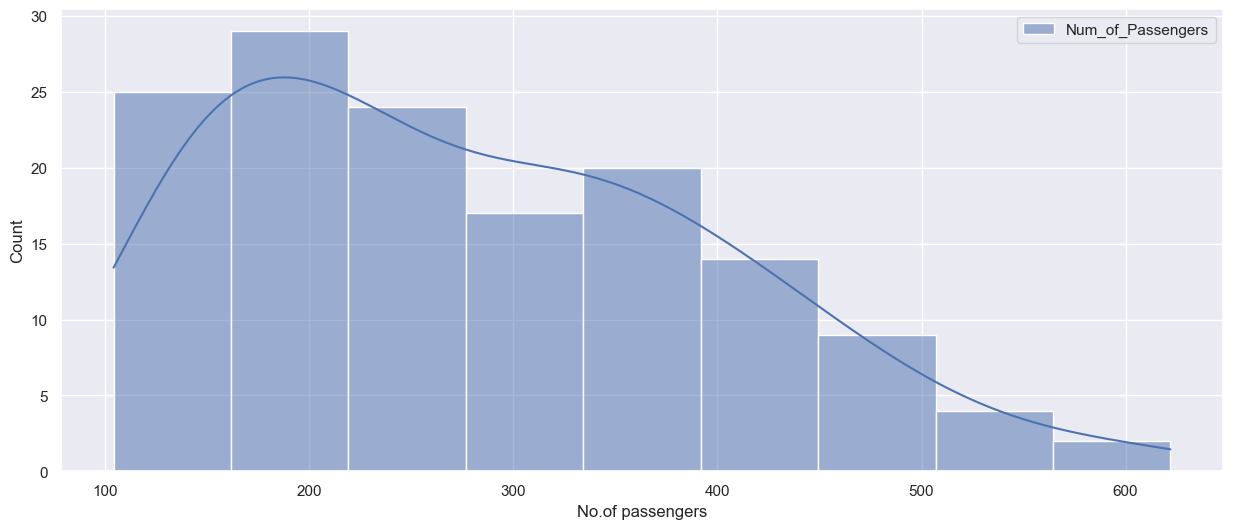

In [16]:
# Density Plot
plt.figure(figsize = (15,6))
sns.histplot(df, kde = True)
plt.xlabel('No.of passengers')
plt.ylabel('Count')
plt.show()

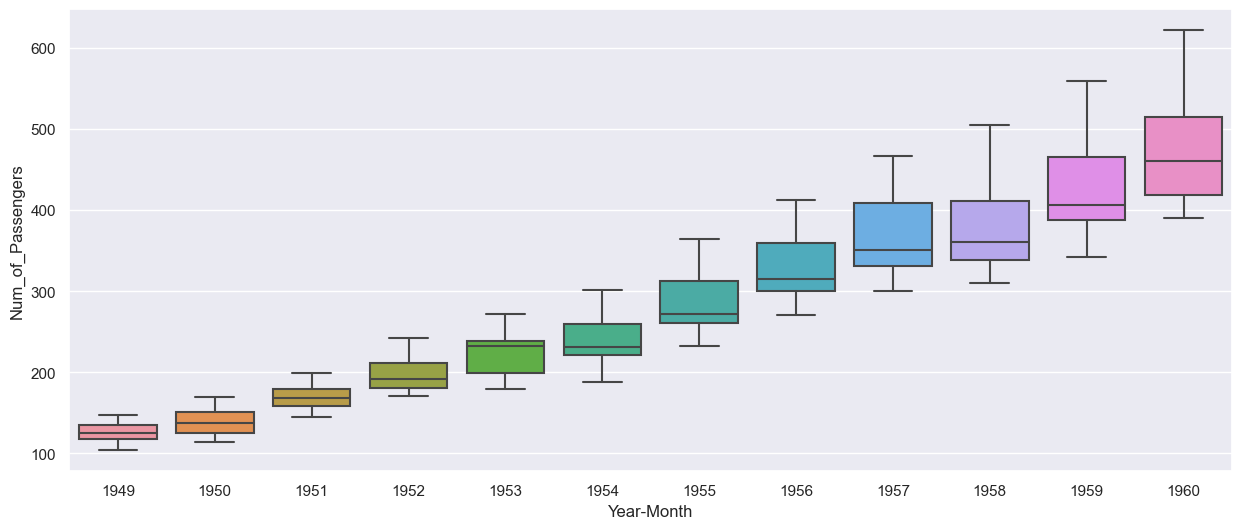

In [17]:
# Box-plot
plt.figure(figsize = (15,6))
sns.boxplot(x = df.index.year, y = df.Num_of_Passengers)
plt.show()

-  From the above box-plot, we can see the median values of each box-plot increasing over time, indicating positive trend.
- The size of boxes is increasing over time, indicating increase in spread or variance over the period.

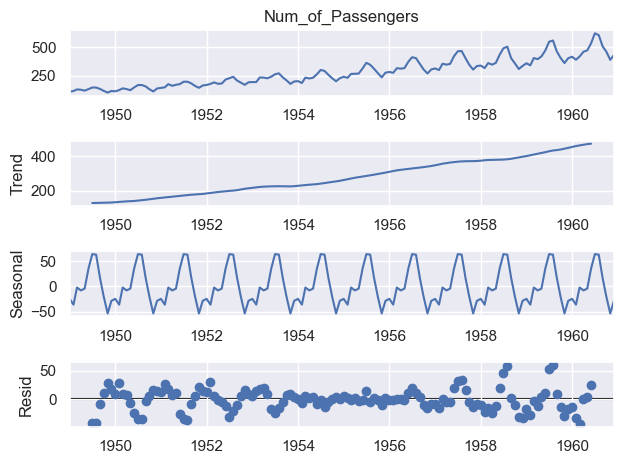

In [18]:
# Decomposition to check dataset pattern

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Num_of_Passengers'], model='additive', period=12)
decomposition.plot()
plt.show()


- We can clearly see there is upward trend and there is seasonality as well

## Stationary Check Test

### Rolling Mean & Rolling Standard Deviation

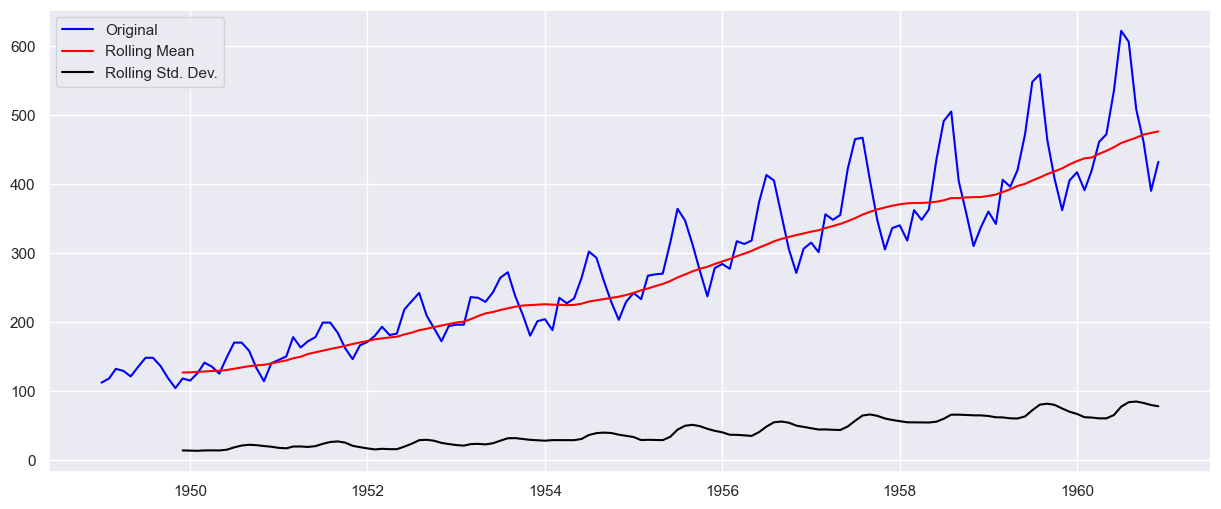

In [19]:

from pylab import rcParams
rolmean = df.rolling(window = 12).mean()
rolstd = df.rolling(window = 12).std()

plt.figure(figsize = (15,6))
orig = plt.plot(df, color = 'blue', label ='Original')
mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
plt.legend(loc = 'best')
plt.show()

- We can observe from the plot that rolling mean and rolling standard deviation are not constant with resepect to time.
- Hence, this confirms us that TS is not stationary in nature.

### Augmented Dickey Fuller Test

In [20]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['Num_of_Passengers'])

(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [21]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("***************Augmented Dickey Fuller Test***************")
    labels = ['ADF Stats Test','p-value','#Lags','No. of obs']
    
    for a, b in zip(result, labels):
        print(b + " : "+ str(a))
        
    if result[1] <=0.05:
        print("Reject Null hypothesis  and my timeseries is Stationary")
    else:
        print("Fail to reject null hypothesis and my timeseries is Non-Stationary")    

In [22]:
adf_check(df['Num_of_Passengers'])

***************Augmented Dickey Fuller Test***************
ADF Stats Test : 0.8153688792060597
p-value : 0.9918802434376411
#Lags : 13
No. of obs : 130
Fail to reject null hypothesis and my timeseries is Non-Stationary


- Here p value is greater than 0.5 fail to reject null hypothesis means data is not stationary

In [23]:
# Creating general function to test stationarity of a time series

def test_stationarity(timeseries):
    # Rolling Mean & Rolling Standard Deviation
    rolmean = timeseries.rolling(window = 12).mean()
    rolstd = timeseries.rolling(window = 12).std()

    plt.figure(figsize = (15,6))
    orig = plt.plot(timeseries, color = 'blue', label ='Original')
    mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
    plt.legend(loc = 'best')
    plt.show()
    
    # Augmented Dicky-Fuller Test
    print('-------------Results of Dicky Fuller Test -------------')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                     'No. of Lags used', 'No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    dfoutput['Maximized AIC:'] = dftest[5]
    print(dfoutput)

### Making Time Series Stationary

### Differencing (d)

In [24]:
ts_diff = df - df.shift(periods = 1) # first differencing

In [25]:
ts_diff

,Num_of_Passengers
Year-Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [26]:
# dropping NA values from differenced TS
ts_diff = ts_diff.dropna()

In [27]:
ts_diff

,Num_of_Passengers
Year-Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


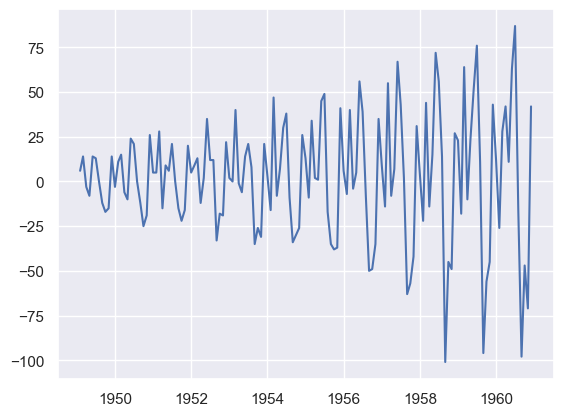

In [28]:
plt.plot(ts_diff)
plt.show()

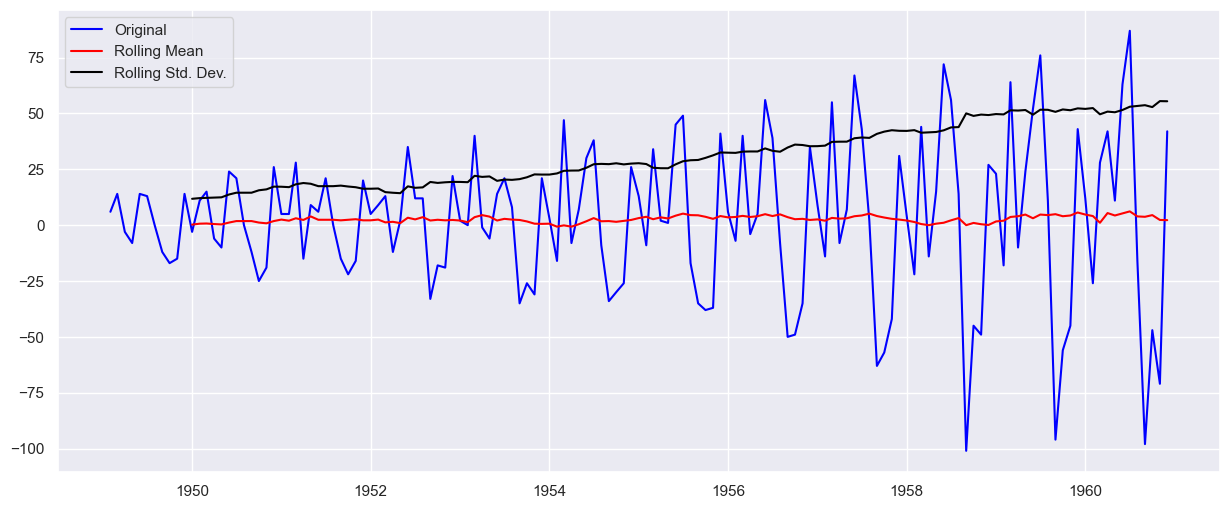

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -2.829267
p-value : MacKinnon's approximate p-value      0.054213
No. of Lags used                              12.000000
No. of observations used                     130.000000
Critical Value (1%)                           -3.481682
Critical Value (5%)                           -2.884042
Critical Value (10%)                          -2.578770
Maximized AIC:                               988.506932
dtype: float64


In [29]:
# Checking stationarity on log transformed, first differencing TS
test_stationarity(ts_diff)

- We can observe that rolling mean & std. dev. are almost const. over time.
- However, we can observe that ADF test accepts Null Hyp. (p-value > 0.05 )
- Hence. TS is still non-stationary.
- Let's try differencing of order 2

In [30]:
# Differencing of order 2 on log transformed TS
ts_diff2 = df - df.shift(periods = 2)

In [31]:
ts_diff2

,Num_of_Passengers
Year-Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,20.0
1949-04-01,11.0
1949-05-01,-11.0
...,...
1960-08-01,71.0
1960-09-01,-114.0
1960-10-01,-145.0


In [32]:
# Dropping NA values
ts_diff2 = ts_diff2.dropna()

In [33]:
ts_diff2

,Num_of_Passengers
Year-Month,
1949-03-01,20.0
1949-04-01,11.0
1949-05-01,-11.0
1949-06-01,6.0
1949-07-01,27.0
...,...
1960-08-01,71.0
1960-09-01,-114.0
1960-10-01,-145.0


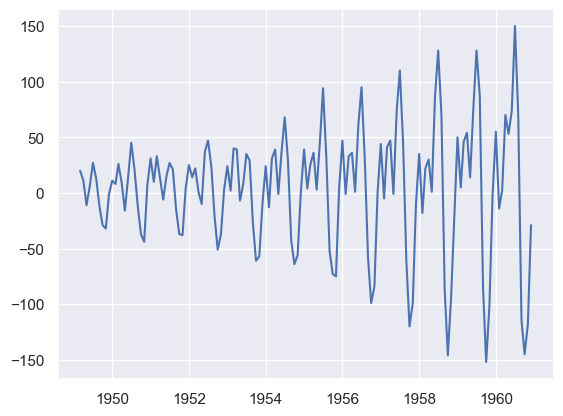

In [34]:
plt.plot(ts_diff2)
plt.show()

- Intuitively, TS plot confirms stationarity of TS.
- Lets confirm it using stationarity tests

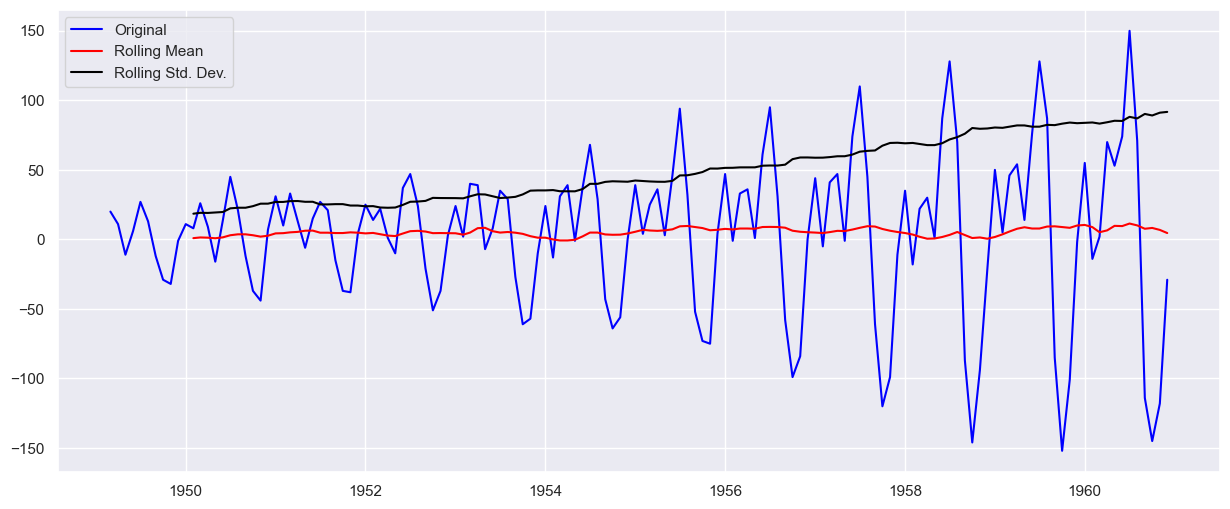

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -2.961695
p-value : MacKinnon's approximate p-value      0.038630
No. of Lags used                              11.000000
No. of observations used                     130.000000
Critical Value (1%)                           -3.481682
Critical Value (5%)                           -2.884042
Critical Value (10%)                          -2.578770
Maximized AIC:                               985.730922
dtype: float64


In [35]:
# Checking stationarity of TS of diff. 2
test_stationarity(ts_diff2)

- Here, both the tests confirm that log transformed TS with differencing of order 2 is stationary as rolling mean & sd are 
almost const. over time.
- Also, p-value in ADF test is less than significance level (0.05), which infers that we can reject Null Hyp.
- We will use this data for model

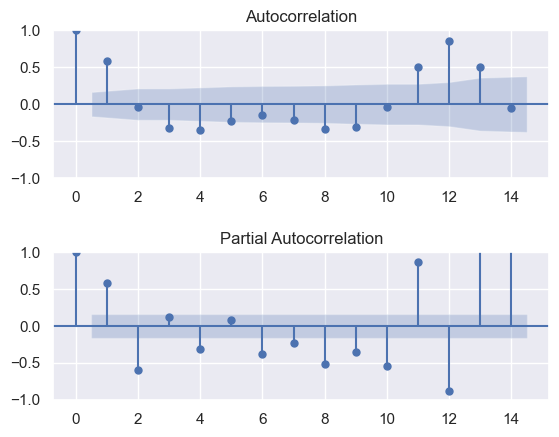

In [36]:
# Estimating p & q parameters from PACF & ACF plot resp.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(ts_diff2['Num_of_Passengers'], ax=plt.gca(), lags = 14)
plt.subplot(212)
plot_pacf(ts_diff2['Num_of_Passengers'], ax=plt.gca(), lags = 14)
plt.subplots_adjust(hspace=0.5)
plt.show()

- ACF & PACF plots show that q = 1 & p = 4


In [37]:
# Seasonal Differencing
ts_seasonal_diff = df - df.shift(periods = 12)

In [38]:
ts_seasonal_diff

,Num_of_Passengers
Year-Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,47.0
1960-09-01,45.0
1960-10-01,54.0


In [39]:
# Dropping NA values
ts_seasonal_diff = ts_seasonal_diff.dropna()

In [40]:
ts_seasonal_diff

,Num_of_Passengers
Year-Month,
1950-01-01,3.0
1950-02-01,8.0
1950-03-01,9.0
1950-04-01,6.0
1950-05-01,4.0
...,...
1960-08-01,47.0
1960-09-01,45.0
1960-10-01,54.0


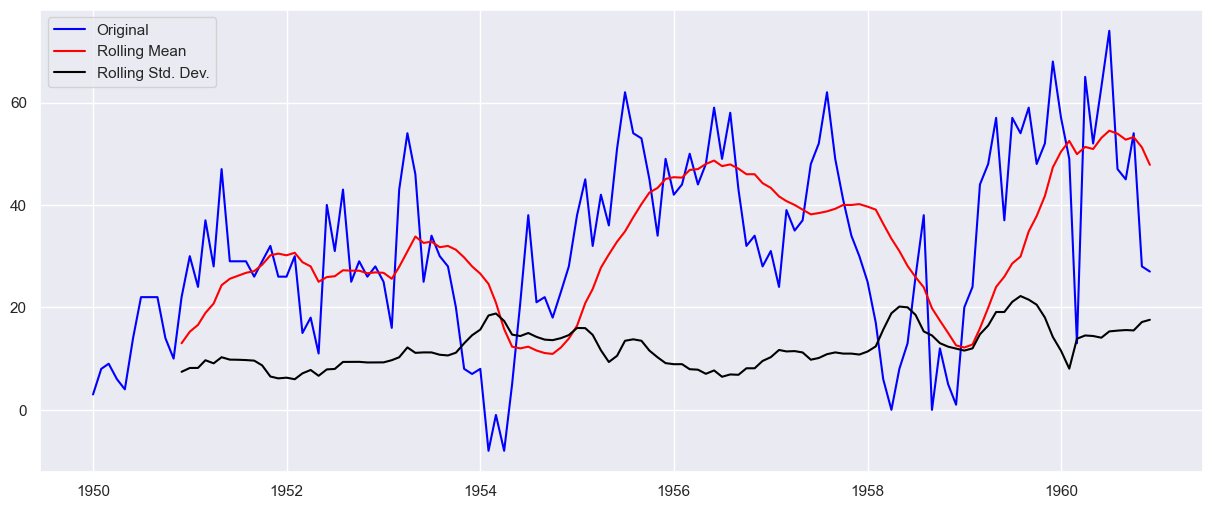

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -3.383021
p-value : MacKinnon's approximate p-value      0.011551
No. of Lags used                               1.000000
No. of observations used                     130.000000
Critical Value (1%)                           -3.481682
Critical Value (5%)                           -2.884042
Critical Value (10%)                          -2.578770
Maximized AIC:                               919.527129
dtype: float64


In [41]:
# Checking stationarity of seasonally differenced data
test_stationarity(ts_seasonal_diff)

- p<0.5 hence time series is stationary 
- we get D = 1 for seasonality

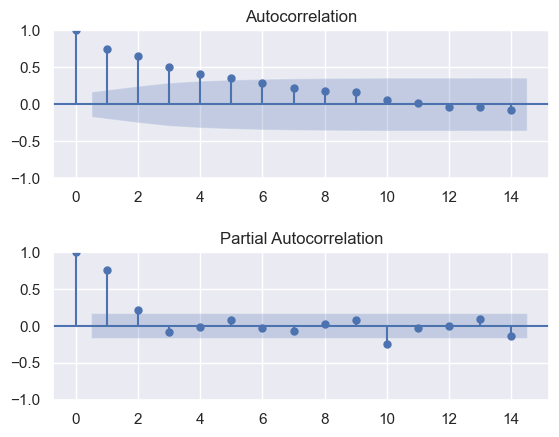

In [83]:
# Estimating P & Q parameters from PACF & ACF plot resp for seasonality
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure()
plt.subplot(211)
plot_acf(ts_seasonal_diff['Num_of_Passengers'], ax=plt.gca(), lags = 14)
plt.subplot(212)
plot_pacf(ts_seasonal_diff['Num_of_Passengers'], ax=plt.gca(), lags = 14)
plt.subplots_adjust(hspace=0.5)
plt.show()

- P = 2 Q= 5

In [48]:
# Trend
# d = 2
# p = 4
# q = 1

# Seasonality
# D = 1
# P = 2
# Q = 5

## ARIMA Model

In [49]:
from statsmodels.tsa.arima.model import ARIMA
import warnings 
warnings.filterwarnings('ignore')

In [50]:
# Splitting TS data into train and test set for model training and testing

In [ ]:
train_ts = df.iloc[0:100,]
test_ts = df.iloc[100: ,]

In [51]:
# Model 1 : ARIMA(4,2,1)

In [ ]:
model1 = ARIMA(train_ts, order = (4,2,1))
results1 = model1.fit()

In [52]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      Num_of_Passengers   No. Observations:                  100
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -440.868
Date:                Wed, 15 Nov 2023   AIC                            893.736
Time:                        16:34:09   BIC                            909.246
Sample:                    01-01-1949   HQIC                           900.009
                         - 04-01-1957                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2304      0.102      2.249      0.024       0.030       0.431
ar.L2         -0.2732      0.113     -2.413      0.016      -0.495      -0.051
ar.L3          0.0445      0.099      0.448      0.654      -0.150       0.239
ar.L4         -0.3403      0.086     -3.935      0.000      -0.510      -0.171
ma.L1         -0.9969      0.477     -2.091      0.037      -1.931      -0.062
sigma2       446.7922    224.375      1.991      0.046       7.024     886.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.64
Prob(Q):                              1.00   Prob(JB):                         0.10
Heteroskedasticity (H):               3.68   Skew:                             0.41
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Making prediction on test data

In [53]:
predictions1 = results1.forecast(steps = len(test_ts))

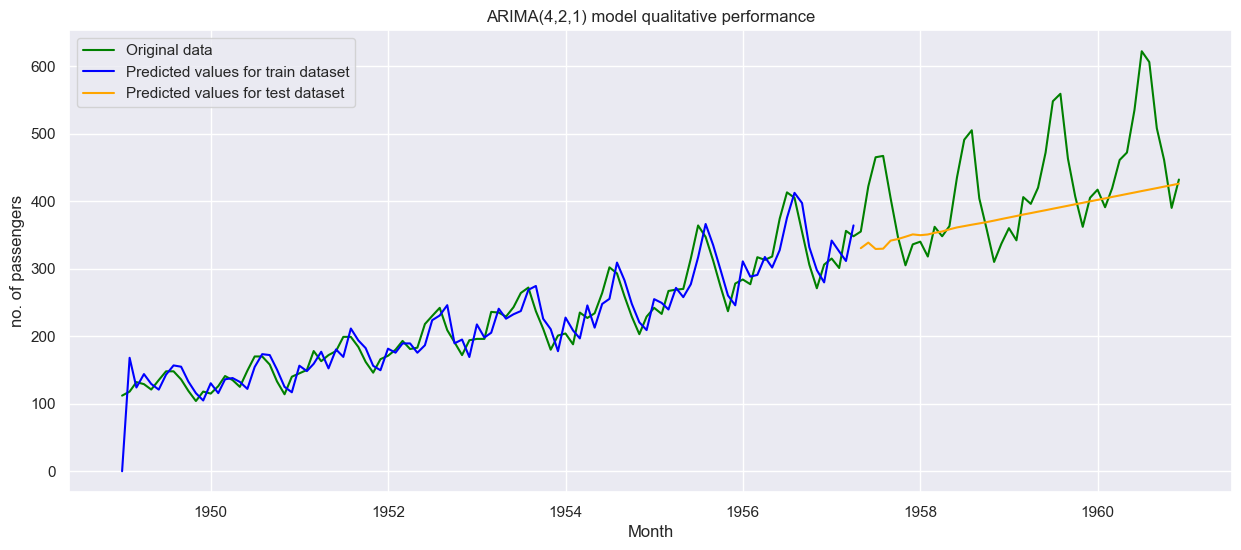

In [100]:
# plotting the model prediction for both train and test data
plt.figure(figsize = (15,6))
plt.plot(df, color = 'green', label = 'Original data')
plt.plot(results1.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(predictions1, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Month')
plt.ylabel('no. of passengers')
plt.title('ARIMA(4,2,1) model qualitative performance')
plt.legend(loc = 'best')
plt.show()

From the graph we observe that predictions on train dataset is very good but on 
test dataset is very poor. The model is overfitting.

In [55]:
# Evaluation metrics for model1
MSE_train_1 = mean_squared_error(train_ts, results1.fittedvalues)
print('Mean Squared Error (MSE) of model ARIMA(3,2,2) for trained data = ',MSE_train_1)
MAE_train_1 = mean_absolute_error(train_ts, results1.fittedvalues)
print('Mean Absolute Error (MAE) of model ARIMA(3,2,2) for trained data = ',MAE_train_1)
RMSE_train_1 = np.sqrt(MSE_train_1)
print('Root Mean Squared Error (RMSE) of model ARIMA(3,2,2) for trained data = ',RMSE_train_1)
MSE_test_1 = mean_squared_error(test_ts, predictions1)
print('Mean Squared Error (MSE) of model ARIMA(3,2,2) for test data = ',MSE_test_1)
MAE_test_1 = mean_absolute_error(test_ts, predictions1)
print('Mean Absolute Error (MAE) of model ARIMA(3,2,2) for test data = ',MAE_test_1)
RMSE_test_1 = np.sqrt(MSE_test_1)
print('Root Mean Squared Error (RMSE) of model ARIMA(3,2,2) for test data = ',RMSE_test_1)

Mean Squared Error (MSE) of model ARIMA(3,2,2) for trained data =  599.8588527427684
Mean Absolute Error (MAE) of model ARIMA(3,2,2) for trained data =  19.46827090376128
Root Mean Squared Error (RMSE) of model ARIMA(3,2,2) for trained data =  24.49201610204371
Mean Squared Error (MSE) of model ARIMA(3,2,2) for test data =  6409.652046928907
Mean Absolute Error (MAE) of model ARIMA(3,2,2) for test data =  58.08709092020677
Root Mean Squared Error (RMSE) of model ARIMA(3,2,2) for test data =  80.06030256580915


## SARIMA MODEL

In [57]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [84]:
model = sm.tsa.statespace.SARIMAX(train_ts,
                             order =(4,2,1), seasonal_order=(2,1,5,12))

results2 = model.fit()
print(results2.summary())

                                            SARIMAX Results                                             
Dep. Variable:                                Num_of_Passengers   No. Observations:                  100
Model:             SARIMAX(4, 2, 1)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -312.252
Date:                                          Wed, 15 Nov 2023   AIC                            650.504
Time:                                                  16:47:59   BIC                            682.410
Sample:                                              01-01-1949   HQIC                           663.345
                                                   - 04-01-1957                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

In [59]:
len(df)

144

In [ ]:
# Making Prediction on test data

In [85]:
predictions2 = results2.forecast(steps = len(test_ts))

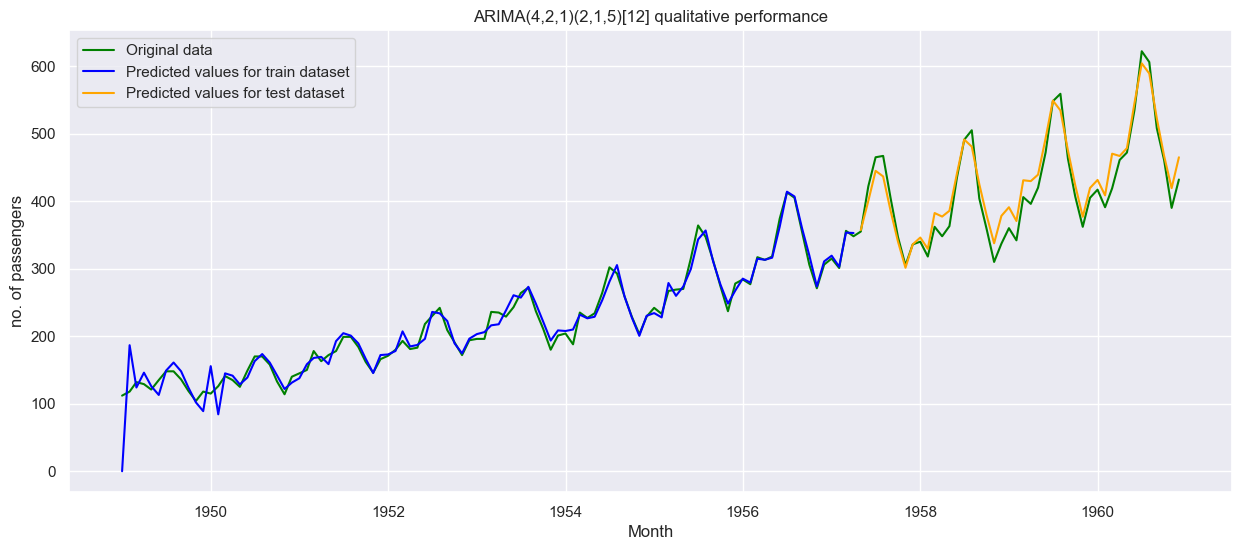

In [101]:
# plotting the model prediction for both train and test data
plt.figure(figsize = (15,6))
plt.plot(df, color = 'green', label = 'Original data')
plt.plot(results2.fittedvalues, color = 'blue', label = 'Predicted values for train dataset')
plt.plot(predictions2, color = 'orange', label = 'Predicted values for test dataset')
plt.xlabel('Month')
plt.ylabel('no. of passengers')
plt.title('ARIMA(4,2,1)(2,1,5)[12] qualitative performance')
plt.legend(loc = 'best')
plt.show()

In [102]:
# Evaluation metrics for model2
MSE_train_2 = mean_squared_error(train_ts, results2.fittedvalues)
print('Mean Squared Error (MSE) of model ARIMA(3,2,2)(0,1,0)[12] for trained data = ',MSE_train_2)
MAE_train_2 = mean_absolute_error(train_ts, results2.fittedvalues)
print('Mean Absolute Error (MAE) of model ARIMA(3,2,2)(0,1,0)[12] for trained data = ',MAE_train_2)
RMSE_train_2 = np.sqrt(MSE_train_2)
print('Root Mean Squared Error (RMSE) of model ARIMA(3,2,2)(0,1,0)[12] for trained data = ',RMSE_train_2)
MSE_test_2 = mean_squared_error(test_ts, predictions2)
print('Mean Squared Error (MSE) of model ARIMA(3,2,2)(0,1,0)[12] for test data = ',MSE_test_2)
MAE_test_2 = mean_absolute_error(test_ts, predictions2)
print('Mean Absolute Error (MAE) of model ARIMA(3,2,2)(0,1,0)[12] for test data = ',MAE_test_2)
RMSE_test_2 = np.sqrt(MSE_test_2)
print('Root Mean Squared Error (RMSE) of model ARIMA(3,2,2)(0,1,0)[12] for test data = ',RMSE_test_2)

Mean Squared Error (MSE) of model ARIMA(3,2,2)(0,1,0)[12] for trained data =  297.7357823171869
Mean Absolute Error (MAE) of model ARIMA(3,2,2)(0,1,0)[12] for trained data =  9.938430797043416
Root Mean Squared Error (RMSE) of model ARIMA(3,2,2)(0,1,0)[12] for trained data =  17.255021944848025
Mean Squared Error (MSE) of model ARIMA(3,2,2)(0,1,0)[12] for test data =  455.4331231647495
Mean Absolute Error (MAE) of model ARIMA(3,2,2)(0,1,0)[12] for test data =  18.17720117834573
Root Mean Squared Error (RMSE) of model ARIMA(3,2,2)(0,1,0)[12] for test data =  21.34087915632225


In [103]:
df.tail()

,Num_of_Passengers
Year-Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [22]:
df.index[-1]

Timestamp('1960-12-01 00:00:00')

In [20]:
# creating month-wise future dates 
from pandas.tseries.offsets import DateOffset
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(25)]
future_dates

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00')]

In [110]:
#converting it in Dataframe
future_dates_df = pd.DataFrame(index=future_dates[1:], columns=df.columns)

In [111]:
# concatnate the both table (original table - dataset and forecast table - future_dates_df)
future_df = pd.concat([df, future_dates_df])

In [112]:
future_df.tail()

,Num_of_Passengers
1962-08-01,NaN
1962-09-01,NaN
1962-10-01,NaN
1962-11-01,NaN
1962-12-01,NaN


In [113]:
len(future_df)

168

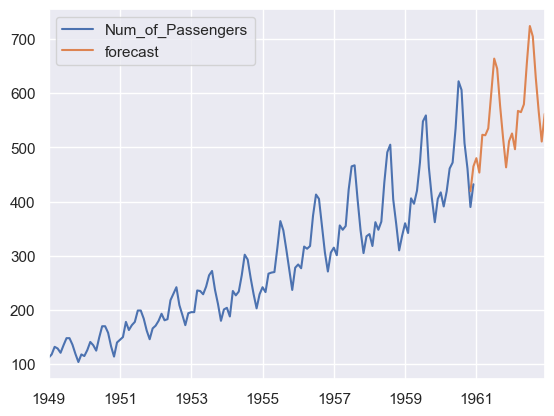

In [114]:
# making prediction for future dates by SARIMA model
future_df['forecast'] = results2.predict(start=142, end=168, dynamic=True)
future_df[['Num_of_Passengers', 'forecast']].plot()

# Show the plot
plt.show()

In [118]:
future_df.tail(24)

,Num_of_Passengers,forecast
1961-01-01,NaN,480.109033
1961-02-01,NaN,453.554270
1961-03-01,NaN,523.267721
1961-04-01,NaN,522.423719
1961-05-01,NaN,535.072885
1961-06-01,NaN,598.751212
1961-07-01,NaN,663.859739
1961-08-01,NaN,645.135024
1961-09-01,NaN,575.811244
1961-10-01,NaN,516.631875


In [119]:
# saving predictions in csv format
future_df.to_csv("Final_Airline_passengers_details_for_2Years.csv")

In [ ]:
# error part theek krna hai(MSE RMSE)

Conclusion
The time series has a stochastic upward trend. The data is initially fitted with the ARIMA model. As expected ARIMA model didn’t perform well on the data because data have seasonality as well. Then the stochastic trend model namely the SARIMA model is fitted as the time series had seasonality. the possible SARIMA models are found using ACF, PACF and Differencing.
A csv file has been created having 2 years prediction for the number of customers
From the forecast it is inferred number of airline passengers is expected to increase.